## CAPSTONE PROJECT

#### Using Deep Learning to Classify and Analyse Musical Instruments Based on Spectrograms and Audio Features

In [1]:
# Importing libraries

import matplotlib.pyplot as plt


In [2]:
# Importing libraries
import os
import librosa
import librosa.display
import glob

In [3]:
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

###### Renaming subfolders and showing number of audio files in each subfolder

In [4]:

# Define the mapping of old names to new names
name_mapping = {
    "cel": "cello",
    "cla": "clarinet",
    "flu": "flute",
    "gac": "guitar_acoustic",
    "gel": "guitar_electric",
    "org": "organ",
    "pia": "piano",
    "sax": "saxophone",
    "tru": "trumpet",
    "vio": "violin",
    "voi": "vocals"
}

# Get a list of all subfolders in the dataset root directory
subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]

# Rename the subfolders according to the name_mapping dictionary and show the number of audio files
for subfolder in subfolders:
    if subfolder in name_mapping:
        # New name for the subfolder
        new_name = name_mapping[subfolder]

        # Get the path of the current subfolder
        subfolder_path = os.path.join(folder_path, subfolder)

        # Get the path of the new subfolder name
        new_subfolder_path = os.path.join(folder_path, new_name)

        # Rename the subfolder
        os.rename(subfolder_path, new_subfolder_path)

# Get a list of all subfolders (new names) in the dataset root directory
subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]

# Count the number of audio files in each subfolder and display the results
for subfolder in subfolders:
    subfolder_path = os.path.join(folder_path, subfolder)
    # Get a list of audio files in the subfolder (assuming they have a certain file extension, e.g., .wav)
    audio_files = glob.glob(os.path.join(subfolder_path, '*.wav'))
    # Print the new name of the subfolder and the number of audio files in it
    print(f"{subfolder} {len(audio_files)}")




cello 388
clarinet 505
flute 451
guitar_acoustic 637
guitar_electric 760
organ 682
piano 721
saxophone 626
trumpet 577
violin 580
vocals 778


### Select specific instruments

In [5]:
import pandas as pd

# The selected instruments you want to include in the data frame
selected_instruments = ["flute","guitar_acoustic","piano", "trumpet","violin"]

# Initialize an empty list to store the data for selected instruments
selected_instruments_data = []

# Loop through the subfolders and collect data for selected instruments
for subfolder in subfolders:
    # Get the instrument name and the number of audio files
    instrument, num_audio_files = subfolder, len(glob.glob(os.path.join(folder_path, subfolder, '*.wav')))
    # Check if the instrument is in the selected instruments list
    if instrument in selected_instruments:
        # Append the data to the selected_instruments_data list
        selected_instruments_data.append((instrument, num_audio_files))

# Create a data frame from the selected_instruments_data list
df = pd.DataFrame(selected_instruments_data, columns=["Instrument", "Num_Audio_Files"])

# Print the data frame
print(df)


        Instrument  Num_Audio_Files
0            flute              451
1  guitar_acoustic              637
2            piano              721
3          trumpet              577
4           violin              580


In [6]:
df.head()

,Instrument,Num_Audio_Files
0,flute,451
1,guitar_acoustic,637
2,piano,721
3,trumpet,577
4,violin,580


### Renaming audio files in subfolders

In [7]:
import os
import pandas as pd

# Replace 'folder_path' with the path to your parent folder containing subfolders
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instruments you want to include in the data frame
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

# Initialize an empty list to store the data for selected instruments
selected_instruments_data = []

# Loop through the subfolders and collect data for selected instruments
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)):
        # Get the instrument name and the number of audio files
        instrument, num_audio_files = subfolder, len(glob.glob(os.path.join(folder_path, subfolder, '*.wav')))
        # Check if the instrument is in the selected instruments list
        if instrument in selected_instruments:
            # Append the data to the selected_instruments_data list
            selected_instruments_data.append((instrument, num_audio_files))

# Create a data frame from the selected_instruments_data list
df = pd.DataFrame(selected_instruments_data, columns=["Instrument", "Num_Audio_Files"])

# Print the data frame
print(df)

# Renaming audio files in each subfolder based on the subfolder name (instrument name)
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)) and subfolder in selected_instruments:
        instrument_name = subfolder
        subfolder_path = os.path.join(folder_path, subfolder)
        audio_files = os.listdir(subfolder_path)
        for i, audio_file in enumerate(audio_files):
            # Extract the file extension (assuming all audio files have the '.wav' extension)
            file_name, file_extension = os.path.splitext(audio_file)
            new_file_name = f"{instrument_name}_{i + 1}{file_extension}"
            old_file_path = os.path.join(subfolder_path, audio_file)
            new_file_path = os.path.join(subfolder_path, new_file_name)

            # Check if the new name already exists, if so, skip renaming this file
            if not os.path.exists(new_file_path):
                os.rename(old_file_path, new_file_path)

# Separate code to display the names given to the audio files in each subfolder
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)) and subfolder in selected_instruments:
        instrument_name = subfolder
        subfolder_path = os.path.join(folder_path, subfolder)
        audio_files = os.listdir(subfolder_path)
        print(f"Audio files in {instrument_name} subfolder:")
        for audio_file in audio_files:
            print(audio_file)


        Instrument  Num_Audio_Files
0            flute              451
1  guitar_acoustic              637
2            piano              721
3          trumpet              577
4           violin              580
Audio files in flute subfolder:
flute_1.wav
flute_10.wav
flute_100.wav
flute_101.wav
flute_102.wav
flute_103.wav
flute_104.wav
flute_105.wav
flute_106.wav
flute_107.wav
flute_108.wav
flute_109.wav
flute_11.wav
flute_110.wav
flute_111.wav
flute_112.wav
flute_113.wav
flute_114.wav
flute_115.wav
flute_116.wav
flute_117.wav
flute_118.wav
flute_119.wav
flute_12.wav
flute_120.wav
flute_121.wav
flute_122.wav
flute_123.wav
flute_124.wav
flute_125.wav
flute_126.wav
flute_127.wav
flute_128.wav
flute_129.wav
flute_13.wav
flute_130.wav
flute_131.wav
flute_132.wav
flute_133.wav
flute_134.wav
flute_135.wav
flute_136.wav
flute_137.wav
flute_138.wav
flute_139.wav
flute_14.wav
flute_140.wav
flute_141.wav
flute_142.wav
flute_143.wav
flute_144.wav
flute_145.wav
flute_146.wav
flute_147.wav
flu

piano_451.wav
piano_452.wav
piano_453.wav
piano_454.wav
piano_455.wav
piano_456.wav
piano_457.wav
piano_458.wav
piano_459.wav
piano_46.wav
piano_460.wav
piano_461.wav
piano_462.wav
piano_463.wav
piano_464.wav
piano_465.wav
piano_466.wav
piano_467.wav
piano_468.wav
piano_469.wav
piano_47.wav
piano_470.wav
piano_471.wav
piano_472.wav
piano_473.wav
piano_474.wav
piano_475.wav
piano_476.wav
piano_477.wav
piano_478.wav
piano_479.wav
piano_48.wav
piano_480.wav
piano_481.wav
piano_482.wav
piano_483.wav
piano_484.wav
piano_485.wav
piano_486.wav
piano_487.wav
piano_488.wav
piano_489.wav
piano_49.wav
piano_490.wav
piano_491.wav
piano_492.wav
piano_493.wav
piano_494.wav
piano_495.wav
piano_496.wav
piano_497.wav
piano_498.wav
piano_499.wav
piano_5.wav
piano_50.wav
piano_500.wav
piano_501.wav
piano_502.wav
piano_503.wav
piano_504.wav
piano_505.wav
piano_506.wav
piano_507.wav
piano_508.wav
piano_509.wav
piano_51.wav
piano_510.wav
piano_511.wav
piano_512.wav
piano_513.wav
piano_514.wav
piano_515.wav


In [8]:
import os
import pandas as pd
import librosa
import numpy as np

# Replace 'folder_path' with the path to your parent folder containing subfolders
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instruments you want to include in the data frame
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

# Initialize lists to store the extracted audio features and corresponding instrument labels
features_list = []
labels_list = []

# Loop through the subfolders and extract audio features
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)) and subfolder in selected_instruments:
        instrument_name = subfolder
        subfolder_path = os.path.join(folder_path, subfolder)
        audio_files = os.listdir(subfolder_path)
        for audio_file in audio_files:
            audio_path = os.path.join(subfolder_path, audio_file)
            # Load the audio file using librosa
            y, sr = librosa.load(audio_path)
            
            # Extract the desired audio features
            # Example: Compute the mean of Mel-frequency cepstral coefficients (MFCCs) over all frames
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            mfcc_mean = np.mean(mfcc, axis=1)
            
            # Add the extracted features and label to the lists
            features_list.append(mfcc_mean)
            labels_list.append(instrument_name)

# Create a data frame for the extracted features
features_df = pd.DataFrame(features_list)

# Add the instrument labels to the data frame
features_df['Instrument'] = labels_list

# Print the data frame containing the extracted features
print(features_df)


               0           1          2          3          4          5  \
0    -337.473877  163.391022 -20.792271 -19.704060 -15.508782 -17.194130   
1    -587.939636  149.929626   2.321452  -5.284139  -3.358227  -0.641348   
2    -353.503967  154.534302 -31.533834   8.909912  -2.078460  -7.813954   
3    -205.111465  111.030457   2.548643  32.414116  10.945980  14.296842   
4    -317.589752  188.804001  -0.964652   5.812916  -4.185506  -0.620454   
...          ...         ...        ...        ...        ...        ...   
2961 -378.759308  108.300713  38.268433  15.579978 -11.428860  21.879665   
2962 -360.374603  161.672287  43.577587  24.669422  -3.353702  10.950603   
2963 -322.313812  147.023041 -22.988264  43.484108  -0.477000  12.404605   
2964 -368.728058  110.897881 -20.038116  39.989010  -0.545460   9.764439   
2965 -311.952759  148.352707 -20.774620  43.184555   2.407995  12.982420   

              6          7          8          9  ...         11         12  \
0    -20

In [9]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Instrument
0,-337.473877,163.391022,-20.792271,-19.704060,-15.508782,-17.194130,-20.047249,-34.314190,-27.674982,-7.780355,...,-7.041254,-16.858717,-11.920739,-4.776387,1.412398,2.682719,-2.022217,-19.741196,-2.928354,flute
1,-587.939636,149.929626,2.321452,-5.284139,-3.358227,-0.641348,-8.874627,-6.474707,1.254965,-2.419511,...,-19.099936,-7.265344,5.862196,11.180741,7.640589,2.175667,-6.319725,-13.854408,-5.021900,flute
2,-353.503967,154.534302,-31.533834,8.909912,-2.078460,-7.813954,-3.339204,10.847145,14.385180,13.026170,...,-11.201878,-19.713562,-14.275689,1.014357,6.960124,1.048140,8.968916,13.460876,11.286994,flute
3,-205.111465,111.030457,2.548643,32.414116,10.945980,14.296842,-10.790370,-5.864502,-9.819433,-2.676086,...,-10.637012,-12.004656,0.687497,-1.526588,8.812408,-7.393153,-15.778409,-14.270913,-9.941313,flute
4,-317.589752,188.804001,-0.964652,5.812916,-4.185506,-0.620454,-0.792919,2.686776,-4.365325,-11.412307,...,-2.898510,-1.754175,-9.367742,-13.166235,-5.413828,-7.455189,-7.187279,-3.036609,-12.114229,flute


In [10]:
# Replace 'folder_path' with the path to your parent folder containing subfolders
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instruments you want to include in the data frame
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

# Initialize lists to store the extracted audio features and corresponding instrument labels
features_list = []
labels_list = []

# Loop through the subfolders and extract audio features
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)) and subfolder in selected_instruments:
        instrument_name = subfolder
        subfolder_path = os.path.join(folder_path, subfolder)
        audio_files = os.listdir(subfolder_path)
        for audio_file in audio_files:
            audio_path = os.path.join(subfolder_path, audio_file)
            # Load the audio file using librosa
            y, sr = librosa.load(audio_path)
            
            # Extract the desired audio features
            # Example: Compute the mean of Mel-frequency cepstral coefficients (MFCCs) over all frames
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            mfcc_mean = np.mean(mfcc, axis=1)
            
            # Add the extracted features and label to the lists
            features_list.append(mfcc_mean)
            labels_list.append(instrument_name)

# Create a data frame for the extracted features
features_df = pd.DataFrame(features_list)

# Add the instrument labels to the data frame
features_df['Instrument'] = labels_list

# Print the names of the extracted audio features
print("Names of the extracted audio features:")
print(features_df.columns[:-1])


Names of the extracted audio features:
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='object')


In [11]:
# Replace 'folder_path' with the path to your parent folder containing subfolders
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instruments you want to include in the data frame
selected_instruments = ["flute", "guitar_acoustic", "piano", "trumpet", "violin"]

# Initialize lists to store the extracted audio features and corresponding instrument labels
features_list = []
labels_list = []

# Loop through the subfolders and extract audio features
for subfolder in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, subfolder)) and subfolder in selected_instruments:
        instrument_name = subfolder
        subfolder_path = os.path.join(folder_path, subfolder)
        audio_files = os.listdir(subfolder_path)
        for audio_file in audio_files:
            audio_path = os.path.join(subfolder_path, audio_file)
            # Load the audio file using librosa
            y, sr = librosa.load(audio_path)
            
            # Extract the desired audio features
            # Example: Compute the mean of Mel-frequency cepstral coefficients (MFCCs) over all frames
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            mfcc_mean = np.mean(mfcc, axis=1)
            
            # Add the extracted features and label to the lists
            features_list.append(mfcc_mean)
            labels_list.append(instrument_name)

# Define column names for the extracted features
column_names = [f"MFCC_{i}" for i in range(features_list[0].shape[0])]

# Create a data frame for the extracted features
features_df = pd.DataFrame(features_list, columns=column_names)

# Add the instrument labels to the data frame
features_df['Instrument'] = labels_list

# Print the names of the extracted audio features
print("Names of the extracted audio features:")
print(features_df.columns[:-1])


Names of the extracted audio features:
Index(['MFCC_0', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6',
       'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12',
       'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18',
       'MFCC_19'],
      dtype='object')


In [12]:
# Get the MFCCs for the first audio file (row 0)
mfcc_values = features_df.iloc[0, :-1]

# Print the MFCC values
print("MFCC values for the first audio file:")
print(mfcc_values)


MFCC values for the first audio file:
MFCC_0    -337.473877
MFCC_1     163.391022
MFCC_2     -20.792271
MFCC_3      -19.70406
MFCC_4     -15.508782
MFCC_5      -17.19413
MFCC_6     -20.047249
MFCC_7      -34.31419
MFCC_8     -27.674982
MFCC_9      -7.780355
MFCC_10     -0.370031
MFCC_11     -7.041254
MFCC_12    -16.858717
MFCC_13    -11.920739
MFCC_14     -4.776387
MFCC_15      1.412398
MFCC_16      2.682719
MFCC_17     -2.022217
MFCC_18    -19.741196
MFCC_19     -2.928354
Name: 0, dtype: object


            MFCC_0       MFCC_1       MFCC_2       MFCC_3       MFCC_4  \
count  2966.000000  2966.000000  2966.000000  2966.000000  2966.000000   
mean   -253.786407   132.772079   -12.447688    25.020216     0.466866   
std     118.135002    43.867023    29.417837    17.184757    12.646667   
min    -669.590393   -39.857330  -118.332298   -58.788082   -47.055012   
25%    -332.176537    99.271046   -31.358914    14.958356    -7.488994   
50%    -251.018501   130.635742   -10.676118    25.777993     1.091303   
75%    -165.921276   166.345688     7.366829    35.672363     9.166029   
max      44.041443   254.003128    79.855347    90.423119    45.894112   

            MFCC_5       MFCC_6       MFCC_7       MFCC_8       MFCC_9  \
count  2966.000000  2966.000000  2966.000000  2966.000000  2966.000000   
mean      4.941574    -3.364677     0.601161    -5.275538    -1.145046   
std      10.915119     9.518309     8.849741     7.831412     8.196423   
min     -39.645996   -43.904381   -37

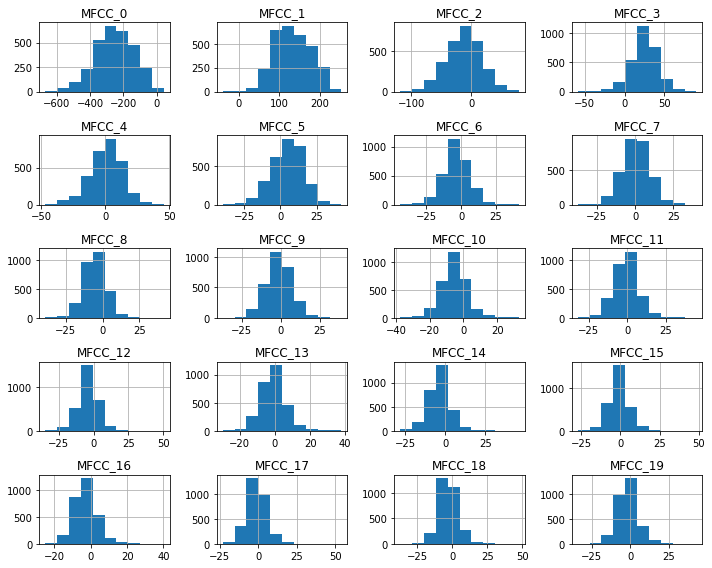

In [13]:
# Summary statistics of the numerical columns
print(features_df.describe())

# Check the data types of columns
print(features_df.dtypes)

# Check the number of instances per instrument class
print(features_df['Instrument'].value_counts())

# Plot histograms of numerical columns
features_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

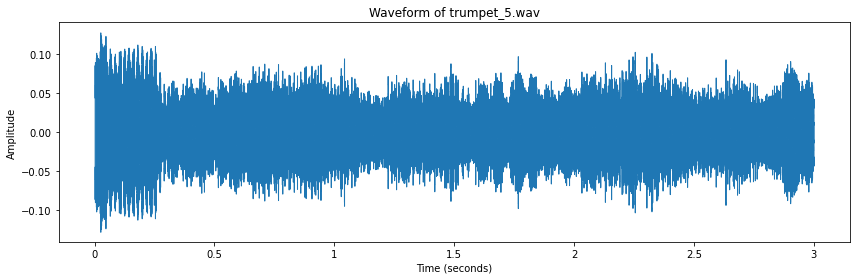

In [20]:

# Replace 'folder_path' with the path to your parent folder containing subfolders
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instrument and audio file you want to plot (adjust these as needed)
selected_instrument = "trumpet"
selected_audio_file = "trumpet_5.wav"

# Find the path to the selected audio file
audio_file_path = os.path.join(folder_path, selected_instrument, selected_audio_file)

# Load the audio file using librosa
y, sr = librosa.load(audio_file_path)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of {selected_audio_file}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()



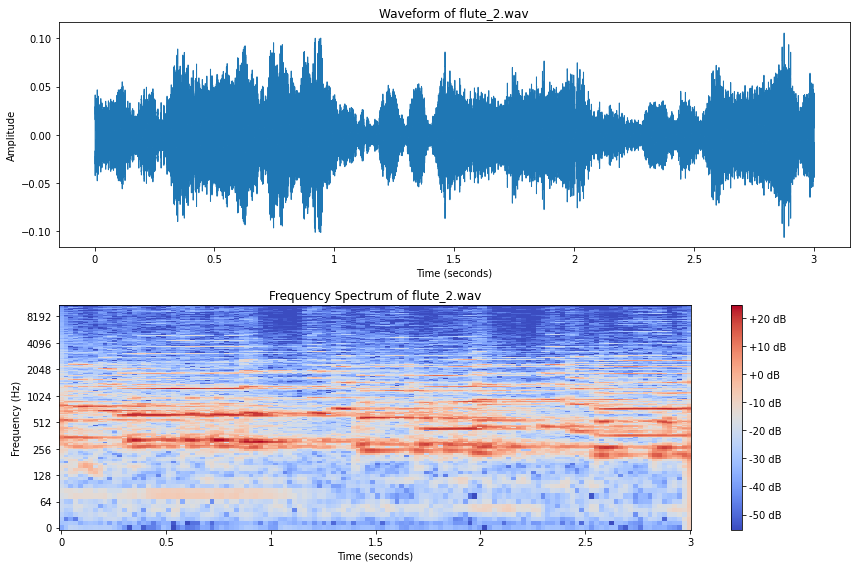

In [21]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Replace 'folder_path' with the path to your parent folder containing subfolders
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\irmasdataset'

# The selected instrument and audio file you want to plot (adjust these as needed)
selected_instrument = "flute"
selected_audio_file = "flute_2.wav"

# Find the path to the selected audio file
audio_file_path = os.path.join(folder_path, selected_instrument, selected_audio_file)

# Load the audio file using librosa
y, sr = librosa.load(audio_file_path)

# Create a time axis for the waveform plot
time = librosa.times_like(y, sr=sr)

# Create a figure with two subplots (for waveform and frequency spectrum)
plt.figure(figsize=(12, 8))

# Plot the waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of {selected_audio_file}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# Compute the Short-Time Fourier Transform (STFT) to get the magnitude spectrum
stft = librosa.stft(y)
mag, _ = librosa.magphase(stft)

# Convert magnitude to decibels (dB) for better visualization
db_mag = librosa.amplitude_to_db(mag)

# Plot the frequency spectrum
plt.subplot(2, 1, 2)
librosa.display.specshow(db_mag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Frequency Spectrum of {selected_audio_file}")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()
